### Arturo Serdan
CSC 405 | 11/11/2021 | Assignment 4

For this assignment, I will be using matplotlib in order to: create a bar chart for number of passengers survived by class, a vertical bar chart for passengers survived by class and gender,
a stacked chart survived vs dead for different classes and gender, plot histogram of fares paid for passengers, e a KDE vs bar plot of the fare, a box plot of the fares by passenger class
and a box plot of the age by passenger class.
I will be doing these by using information obtained from the previous assingment as well as new information from the dataframe as needed.

## Plotting Titanic Dataset

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import pandas as pd

In [16]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Create a bar chart for number of passengers survived by class

In [17]:
# Grouping by people who survived (1) and those who did not (0); assuming 1 is survived and 0 is not
survived_passengers = titanic.groupby(by = ['survived'])
survived_passengers.head()

# Gets the survivors per class
t_class1 = titanic.loc[titanic['pclass'] == 1]
t_class2 = titanic.loc[titanic['pclass'] == 2]
t_class3 = titanic.loc[titanic['pclass'] == 3]

survivors_class1 = t_class1[t_class1['survived'] == 1].survived.count()
survivors_class2 = t_class2[t_class2['survived'] == 1].survived.count()
survivors_class3 = t_class3[t_class3['survived'] == 1].survived.count()

Text(0.5, 1.0, 'Survivors per class')

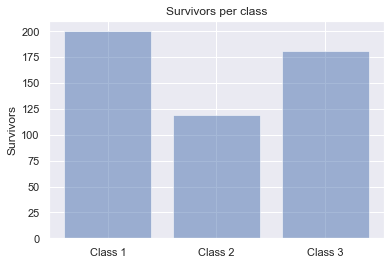

In [18]:
# Graphing for the 3 classes
y_classes = ['Class 1', 'Class 2', 'Class 3']
x_values = [survivors_class1, survivors_class2, survivors_class3]

plt.bar(y_classes, x_values, align='center', alpha=0.5)
plt.ylabel('Survivors')
plt.title('Survivors per class')

#### 2. Create a vertical bar chart for passengers survived by class and gender

In [19]:
# Filtering through data only for those who survived
class_and_sex_survivors = titanic.loc[titanic['survived'] == 1]
class_and_sex_survivors.groupby(['pclass', 'sex']).count()

# Gets the survivors by class and sex
class1_female_survivors = (class_and_sex_survivors.groupby(['pclass', 'sex']).get_group((1,'female')).count())['pclass']
class1_male_survivors = (class_and_sex_survivors.groupby(['pclass', 'sex']).get_group((1,'male')).count())['pclass']

class2_female_survivors = (class_and_sex_survivors.groupby(['pclass', 'sex']).get_group((2,'female')).count())['pclass']
class2_male_survivors = (class_and_sex_survivors.groupby(['pclass', 'sex']).get_group((2,'male')).count())['pclass']

class3_female_survivors = (class_and_sex_survivors.groupby(['pclass', 'sex']).get_group((3,'female')).count())['pclass']
class3_male_survivors = (class_and_sex_survivors.groupby(['pclass', 'sex']).get_group((3,'male')).count())['pclass']

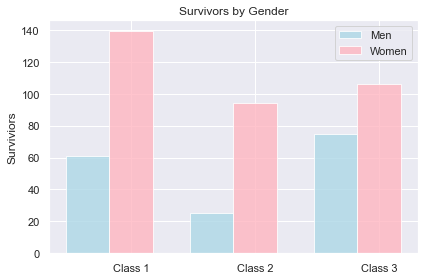

In [20]:
# Graphing 
# data to plot
n_groups = 3
survivor_men_classes = (class1_male_survivors, class2_male_survivors, class3_male_survivors)
survivor_women_classes = (class1_female_survivors, class2_female_survivors, class3_female_survivors)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, survivor_men_classes, bar_width,
alpha=opacity,
color='lightBlue',
label='Men')

rects2 = plt.bar(index + bar_width, survivor_women_classes, bar_width,
alpha=opacity,
color='lightPink',
label='Women')

# plt.xlabel('Person')
plt.ylabel('Surviviors')
plt.title('Survivors by Gender')
plt.xticks(index + bar_width, ('Class 1', 'Class 2', 'Class 3'))
plt.legend()

plt.tight_layout()
plt.show()

#### 3. Create a stacked chart survived vs dead for different classes and gender

In [21]:
# Gets the deaths
deaths_by_class_and_sex = titanic.loc[titanic['survived'] == 0]
deaths_by_class_and_sex.groupby(['pclass', 'sex']).count()

# Gets the deaths by class and sex
class1_female_deaths = (deaths_by_class_and_sex.groupby(['pclass', 'sex']).get_group((1,'female')).count())['pclass']
class1_male_deaths = (deaths_by_class_and_sex.groupby(['pclass', 'sex']).get_group((1,'male')).count())['pclass']

class2_female_deaths = (deaths_by_class_and_sex.groupby(['pclass', 'sex']).get_group((2,'female')).count())['pclass']
class2_male_deaths = (deaths_by_class_and_sex.groupby(['pclass', 'sex']).get_group((2,'male')).count())['pclass']

class3_female_deaths = (deaths_by_class_and_sex.groupby(['pclass', 'sex']).get_group((3,'female')).count())['pclass']
class3_male_deaths = (deaths_by_class_and_sex.groupby(['pclass', 'sex']).get_group((3,'male')).count())['pclass']

# death_men_classes = (class1_male_deaths, class2_male_deaths, class3_male_deaths)
# death_women_classes = (class1_female_deaths, class2_female_deaths, class3_female_deaths)

# survivor_men_classes = (class1_male_survivors, class2_male_survivors, class3_male_survivors)
# survivor_women_classes = (class1_female_survivors, class2_female_survivors, class3_female_survivors)

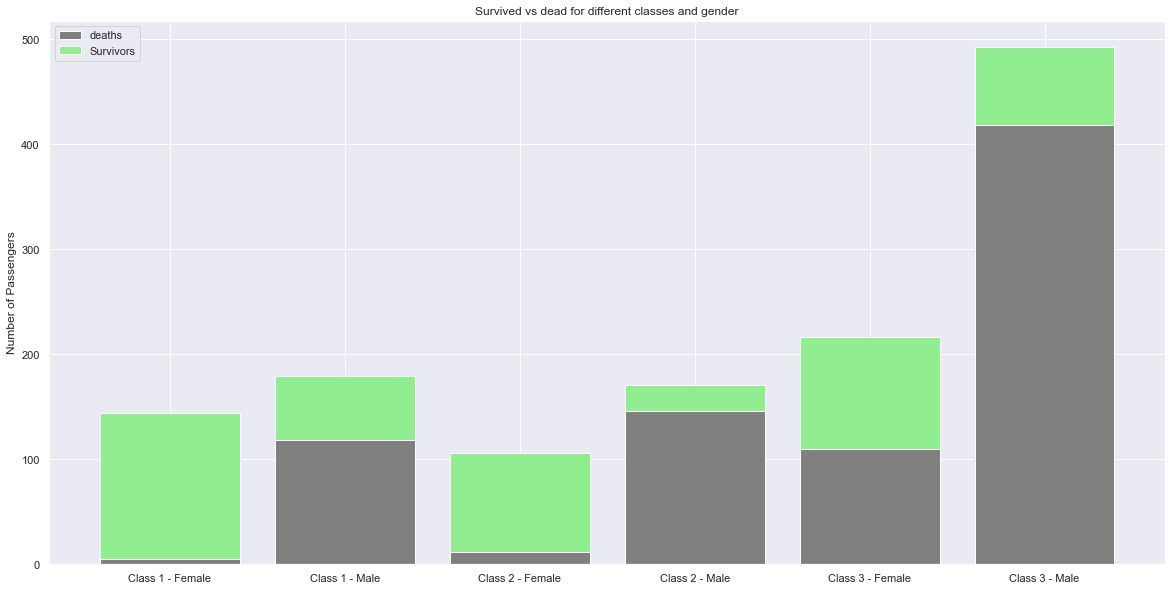

In [22]:
# Graphing the stacked chart survived vs dead for different classes and gender

labels = ['Class 1 - Female', 'Class 1 - Male', 'Class 2 - Female', 'Class 2 - Male', 'Class 3 - Female', 'Class 3 - Male']

all_daths = (class1_female_deaths, class1_male_deaths, class2_female_deaths, class2_male_deaths, class3_female_deaths, class3_male_deaths)
all_survivors = (class1_female_survivors, class1_male_survivors, class2_female_survivors, class2_male_survivors, class3_female_survivors, class3_male_survivors)

fig, ax = plt.subplots()

ax.bar(labels, all_daths, label='deaths', color='grey')
ax.bar(labels, all_survivors, bottom=all_daths,label='Survivors', color='lightGreen')

ax.set_ylabel('Number of Passengers')
ax.set_title('Survived vs dead for different classes and gender')
ax.legend()
fig.set_size_inches(20, 10)
plt.show()

#### 4. Plot histogram of fares paid for passengers bins = 30

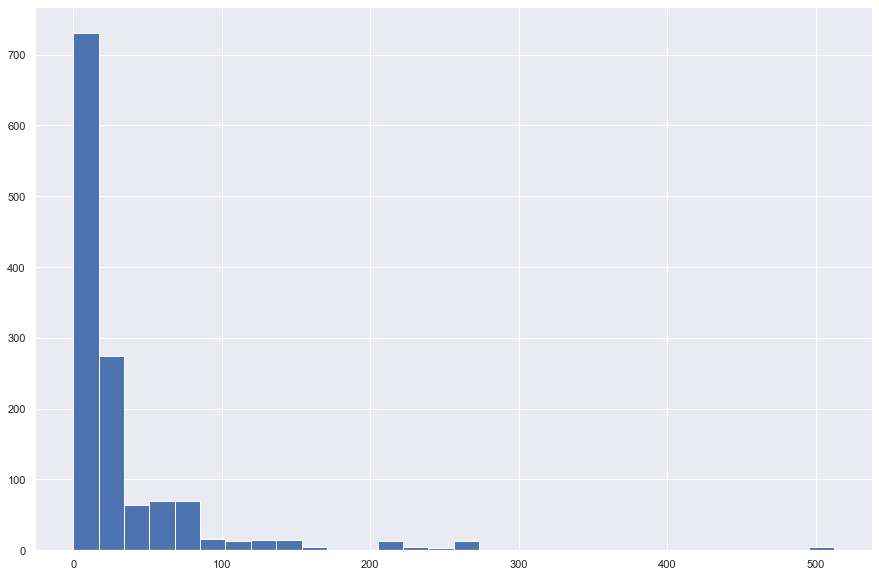

In [23]:
# Graphing the histogram
# Gets the fare paid for all the passengers
x = titanic['fare']

fig, ax = plt.subplots(figsize =(15, 10))
ax.hist(x, bins = 30) 
plt.show()

#### 5.Create a KDE vs bar plot of the fare

C:\Users\artur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

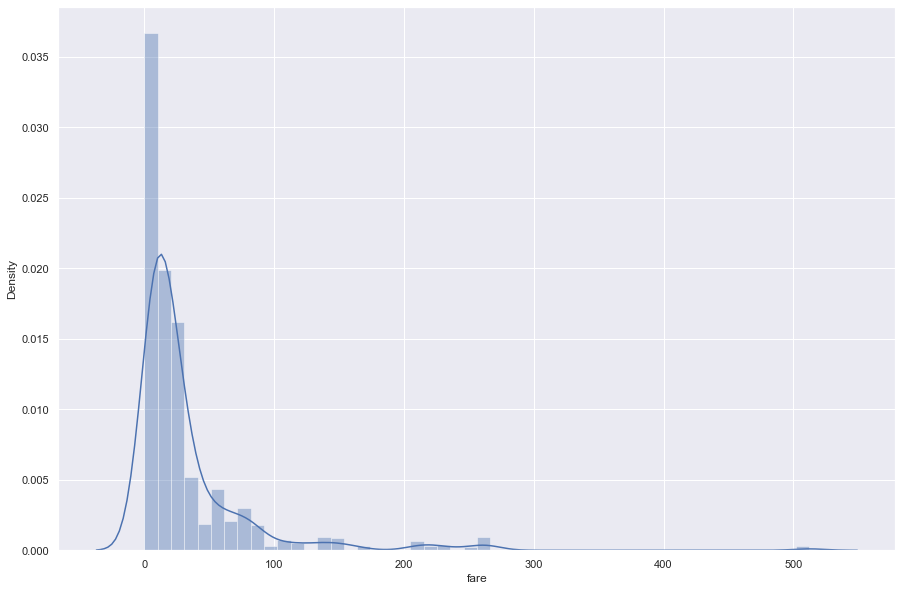

In [24]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,10)})
sns.set_style()
sns.distplot(x)


#### 6. Create a box plot of the fares by passenger class

In [25]:
# Gets the fares paid per class

all_fares_paid = pd.DataFrame()
t_fare_paid_class1 = pd.DataFrame()
t_fare_paid_class2 = pd.DataFrame()
t_fare_paid_class3 = pd.DataFrame()

t_fare_paid_class1['class1'] = (titanic.loc[titanic['pclass'] == 1])['fare']
t_fare_paid_class2['class2'] = (titanic.loc[titanic['pclass'] == 2])['fare']
t_fare_paid_class3['class3'] = (titanic.loc[titanic['pclass'] == 3])['fare']

t_fare_paid_class1 = t_fare_paid_class1.reset_index()
t_fare_paid_class2 = t_fare_paid_class2.reset_index()
t_fare_paid_class3 = t_fare_paid_class3.reset_index()

t_fare_paid_class1 = (t_fare_paid_class1.T.drop(['index'])).T
t_fare_paid_class2 = (t_fare_paid_class2.T.drop(['index'])).T
t_fare_paid_class3 = (t_fare_paid_class3.T.drop(['index'])).T

all_fares_paid['class_3'] = t_fare_paid_class3
all_fares_paid['class_2'] = t_fare_paid_class2
all_fares_paid['class_1'] = t_fare_paid_class1

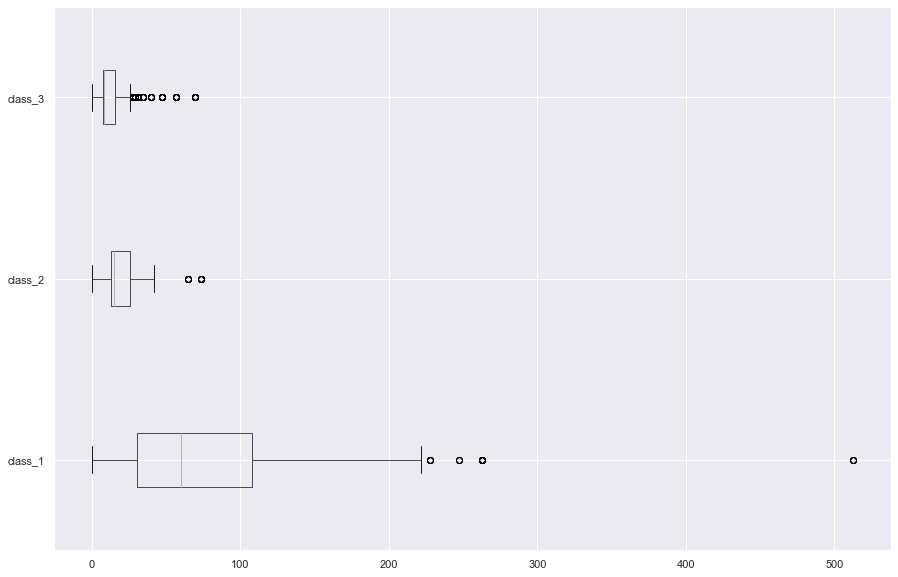

In [26]:
# Graphing a box plot of the fares by passenger class

fares_boxplot = pd.DataFrame()
fares_boxplot = all_fares_paid.boxplot(column=['class_1', 'class_2', 'class_3'], return_type= 'axes', vert = False)
plt.show(fares_boxplot)

#### 7. Create a box plot of the age by passenger class

In [27]:
# Gets the fares paid per class

all_ages_per_classes = pd.DataFrame()
t_ages_in_class1 = pd.DataFrame()
t_ages_in_class2 = pd.DataFrame()
t_ages_in_class3 = pd.DataFrame()

t_ages_in_class1['class1'] = (titanic.loc[titanic['pclass'] == 1])['age']
t_ages_in_class2['class2'] = (titanic.loc[titanic['pclass'] == 2])['age']
t_ages_in_class3['class3'] = (titanic.loc[titanic['pclass'] == 3])['age']

t_ages_in_class1 = t_ages_in_class1.reset_index()
t_ages_in_class2 = t_ages_in_class2.reset_index()
t_ages_in_class3 = t_ages_in_class3.reset_index()

t_ages_in_class1 = (t_ages_in_class1.T.drop(['index'])).T
t_ages_in_class2 = (t_ages_in_class2.T.drop(['index'])).T
t_ages_in_class3 = (t_ages_in_class3.T.drop(['index'])).T

all_ages_per_classes['class_3'] = t_ages_in_class3
all_ages_per_classes['class_2'] = t_ages_in_class2
all_ages_per_classes['class_1'] = t_ages_in_class1

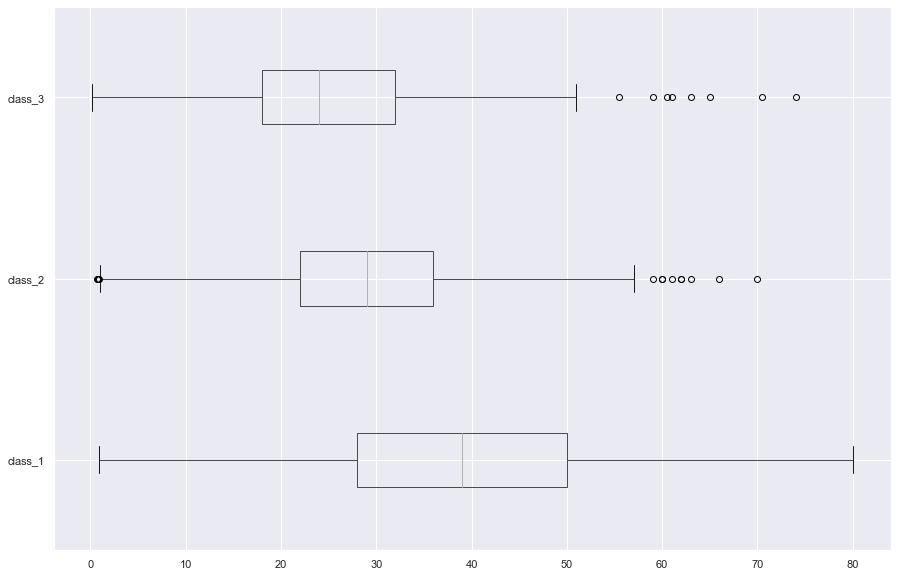

In [28]:
# Graphing a box plot of the fares by passenger class

ages_boxplot = pd.DataFrame()
ages_boxplot = all_ages_per_classes.boxplot(column=['class_1', 'class_2', 'class_3'], return_type= 'axes', vert = False)
plt.show(ages_boxplot)

#### Try Plotly to do all of the above

## All the above tasks were done using Plotly, with the exception of task 5 where I used seaborn instead. 